Identitas:
Muhammad Zukri AL Walidani 
Batch 007

Import Pustaka

In [38]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Buatlah model linear regression untuk memprediksi biaya asuransi menggunakan dataset 

Import data

In [2]:
df=pd.read_csv('insurance.csv')

ekplorasi data sederhana

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1]:
df.age.unique()

NameError: name 'df' is not defined

In [8]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

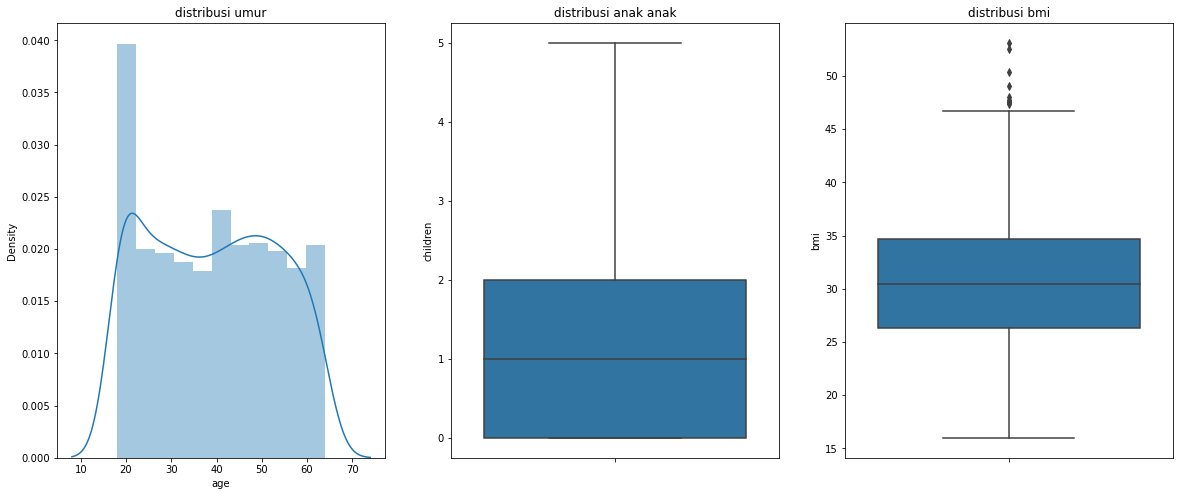

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('distribusi umur')
sns.distplot(df.age)

plt.subplot(1,3,2)
plt.title('distribusi anak anak')
sns.boxplot(y=df.children)

plt.subplot(1,3,3)
plt.title('distribusi bmi')
sns.boxplot(y=df.bmi)
plt.show()


<AxesSubplot:title={'center':'distribusi charges'}, xlabel='charges', ylabel='Density'>

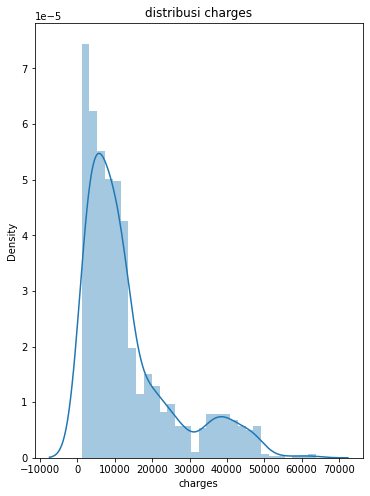

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('distribusi charges')
sns.distplot(df.charges)


inference:
1. Data terdistribusi normal, paling banyak konsumen asuransi merupakan umur 19-20 tahun
2. konsumen rat rata memiliki 0-2 anak
3. BMi berkisar 26-35

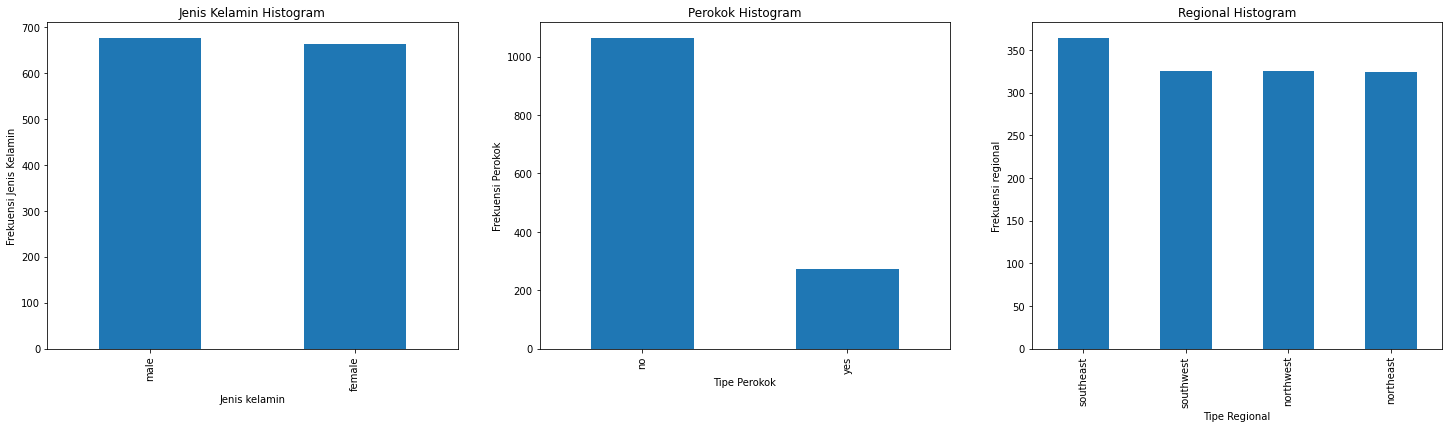

In [13]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.sex.value_counts().plot(kind='bar')
plt.title('Jenis Kelamin Histogram')
plt1.set(xlabel = 'Jenis kelamin', ylabel='Frekuensi Jenis Kelamin')

plt.subplot(1,3,2)
plt1 = df.smoker.value_counts().plot(kind='bar')
plt.title('Perokok Histogram')
plt1.set(xlabel = 'Tipe Perokok', ylabel='Frekuensi Perokok')

plt.subplot(1,3,3)
plt1 = df.region.value_counts().plot(kind='bar')
plt.title('Regional Histogram')
plt1.set(xlabel = 'Tipe Regional', ylabel='Frekuensi regional')

plt.show()


Inference:
1. Konsumen asuransi pria lebih banyak dari pada wanita
2. konsumen tidak perokok mendominasi dari pada yang tidak merokok
3. Southeast merupakan regional tertinggi selebihnya merata

Visualisasi data numerik

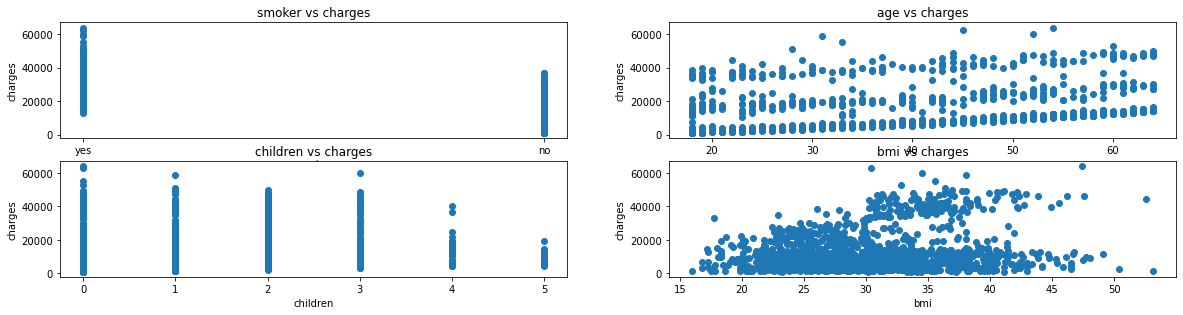

In [20]:
def scatter(x,fig):
    plt.subplot(8,2,fig)
    plt.scatter(df[x],df['charges'])
    plt.title(x+' vs charges')
    plt.ylabel('charges')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('smoker', 1)
scatter('age', 2)
scatter('children', 3)
scatter('bmi', 4)

inference
1. umur dan bmi memiliki korelasi yang positif dengan biaya
2. status peokok dan jumlah anak berkorelasi negatif dengan biaya 

Menentukan parameter

<AxesSubplot:>

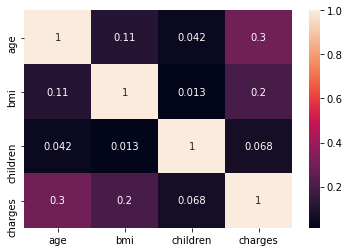

In [21]:
sns.heatmap(df.corr(), annot=True)

Splitting data

In [22]:
X = df[['children', 'bmi', 'age']]
y = df['charges']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [26]:
print(lin_reg.intercept_)

13379.157306773504


In [27]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
children,777.706418
bmi,2010.973459
age,3233.157577


1. penambahan 1 orang anak akan menambah pemasukan asuransi sebesar 777 dollar
2. kanaikan 1 bmi akan menambah pmasukan asuransi sebesar 2010 us dollar
3. setiap kenaikan usia akan menambah pemasukan asuransi sebesar 3233 dollar

Evaluasi model

In [37]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 9079.649028580898
MSE: 127399626.37416688
RMSE: 11287.144296684031
R2 Square 0.13111524136803365
__________________________________
Train set evaluation:
_____________________________________
MAE: 9071.269897345574
MSE: 129686954.65244868
RMSE: 11388.01803003704
R2 Square 0.11457378802682394
__________________________________


2. model Logistic Regression untuk mengklasifikasikan tipe galaksi menggunakan dataset 

In [39]:
dv=pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv')

Eksplorasi data sederhana

In [40]:
dv

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1
...,...,...,...,...,...,...,...,...,...
19995,19995,4.631655,29.018608,0.358020,0.602471,0.832848,1.611594,0.735315,1
19996,19996,-2.179893,15.245582,0.470026,0.842624,0.868289,1.313089,0.649996,1
19997,19997,1.876151,6.907812,0.323334,0.830340,0.950820,1.406042,0.671217,1
19998,19998,5.053256,27.981613,0.393574,0.632766,0.825990,1.659363,0.379448,1


In [41]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   TType                20000 non-null  float64
 2   K                    20000 non-null  float64
 3   C                    20000 non-null  float64
 4   A                    20000 non-null  float64
 5   S                    20000 non-null  float64
 6   G2                   20000 non-null  float64
 7   H                    20000 non-null  float64
 8   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [42]:
dv.describe()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,0.395287,18.708788,-1846.175115,0.323992,-3.220560,0.747130,0.655137,0.807200
std,5773.647028,2.432726,26.185899,3880.385347,70.716614,199.980672,70.720857,0.113237,0.394507
min,0.000000,-2.913205,1.471492,-9999.999999,-9999.999999,-9999.999999,-9999.999999,0.017008,0.000000
25%,4999.750000,-1.952929,7.039827,0.292831,0.782718,0.757618,0.979765,0.585356,1.000000
50%,9999.500000,-0.071197,11.781205,0.365902,0.859172,0.844121,1.364905,0.659603,1.000000
75%,14999.250000,2.376115,20.920884,0.437227,0.905404,0.889421,1.606039,0.743029,1.000000
max,19999.000000,7.773612,1035.467764,0.761184,0.986535,0.979032,1.953389,0.929947,1.000000


Splitting data

In [59]:
A = dv[['C','A','S','G2','H']]
b = dv['CNN2classes1stClass']

In [60]:
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=42)

Optimal number of features: 2
Selected features: ['A', 'H']


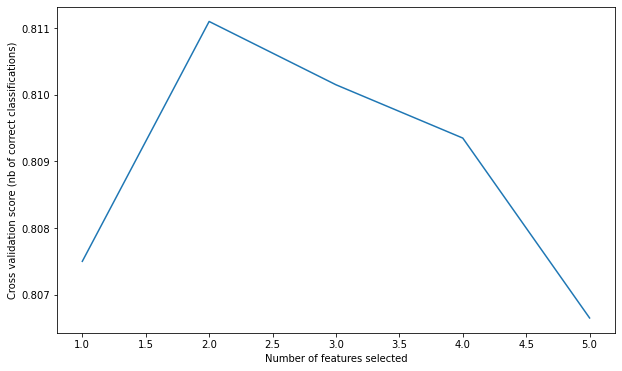

In [61]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(A, b)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(A.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

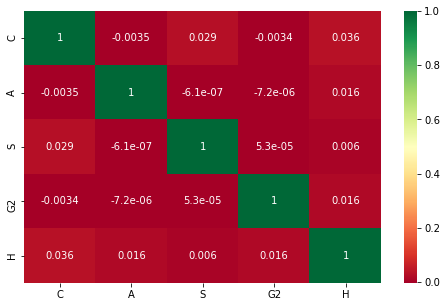

In [63]:
Selected_features = ['C','A','S','G2','H']
X = dv[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Evaluasi model

Train/Test split results:
LogisticRegression accuracy is 0.797
LogisticRegression log_loss is 0.391
LogisticRegression auc is 0.826


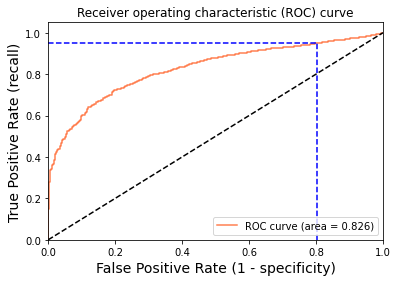

Using a threshold of 0.563 guarantees a sensitivity of 0.950 and a specificity of 0.197, i.e. a false positive rate of 80.33%.


In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
A = dv[Selected_features]
b = dv['CNN2classes1stClass']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(A_train, b_train)
b_pred = logreg.predict(A_test)
b_pred_proba = logreg.predict_proba(A_test)[:, 1]
[fpr, tpr, thr] = roc_curve(b_test, b_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(b_test, b_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(b_test, b_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))